In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [4]:
advertising_file_path = "./advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

,Sales,variable,value
0,22.1,TV,230.1
1,10.4,TV,44.5
2,12.0,TV,17.2
3,16.5,TV,151.5
4,17.9,TV,180.8
...,...,...,...
595,7.6,Newspaper,13.8
596,14.0,Newspaper,8.1
597,14.8,Newspaper,6.4
598,25.5,Newspaper,66.2


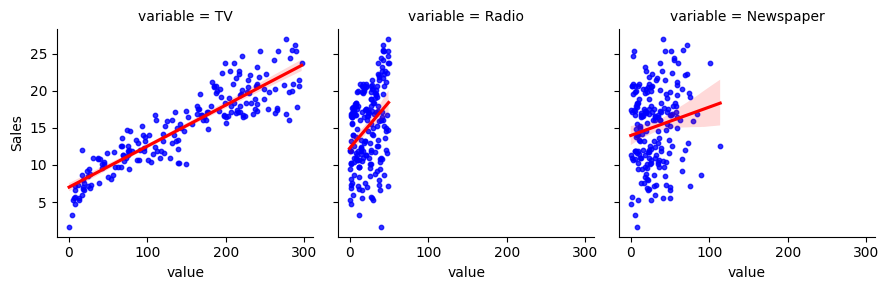

In [6]:
advertising_grid = pd.melt(advertising, id_vars="Sales", value_vars=['TV','Radio','Newspaper'])
g= sns.FacetGrid(advertising_grid, col="variable")
g.map(sns.regplot,"value","Sales", ci=95, scatter_kws={"color":"Blue",'s':10},
      line_kws={"color":"red"});
advertising_grid

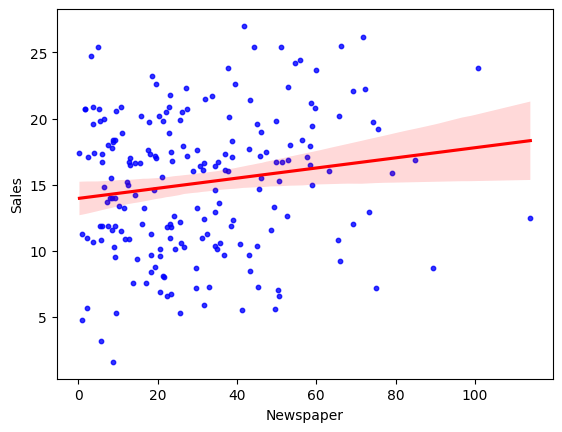

In [10]:
sns.regplot(data=advertising, x='Newspaper', y='Sales', ci=95,
            scatter_kws={"color":"blue",'s':10},
            line_kws={"color":"red"});

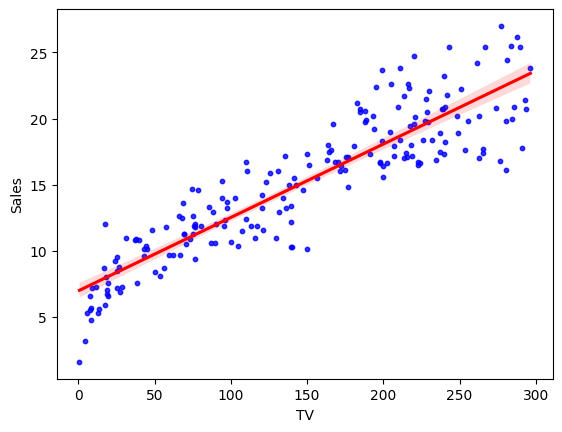

In [11]:
sns.regplot(data=advertising, x='TV', y='Sales', ci=95,
            scatter_kws={"color":"blue",'s':10},
            line_kws={"color":"red"});

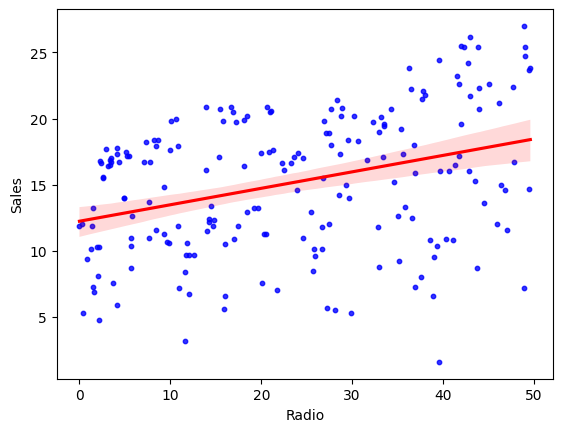

In [12]:
sns.regplot(data=advertising, x='Radio', y='Sales', ci=95,
            scatter_kws={"color":"blue",'s':10},
            line_kws={"color":"red"});

In [13]:
beta_0 = 7.975
beta_1 = 0.055

mean_y = advertising.Sales.mean()
mean_y

tss_i = advertising.Sales.apply(lambda yi: (yi-mean_y)**2)
tss = tss_i.sum()
tss

y_hat_i = beta_0 + beta_1 * advertising.TV
y_hat_i

i_count = advertising.shape[0]
rss_i =[(advertising.Sales[i]-y_hat_i[i])**2 for i in range(i_count)]

rss = sum(rss_i)
rss

r2=(tss-rss)/tss

print("R2: ", np.round(r2,3))

R2:  0.781


In [14]:
import statsmodels.api as sm

In [15]:
X_t = np.array(advertising.TV, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

X=sm.add_constant(X)

model= sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           7.93e-74
Time:                        23:33:21   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0